# **European Cars DataSet**

**Importing necessary libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Loading DataSet**

In [41]:
df = pd.read_csv('/content/data.csv')

In [42]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


# **Data Cleaning**

In [43]:
df.shape

(251079, 15)

In [44]:
df.dtypes

Unnamed: 0                    int64
brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

In [45]:
df.isna().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [46]:
df.shape

(251079, 15)

In [47]:
columns_to_drop = ['Unnamed: 0', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'offer_description']
df = df.drop(columns=columns_to_drop)

In [48]:
columns_to_drop = ['year']
df = df.drop(columns=columns_to_drop)

In [49]:
# renaming columns
new_columns = {
    'brand': 'Brand',
    'model': 'Model',
    'color': 'Color',
    'registration_date': 'Registration Date',
    'price_in_euro': 'Price (Euro)',
    'power_kw': 'Power (kW)',
    'power_ps': 'Power (PS)',
    'transmission_type': 'Transmission Type',
    'fuel_type': 'Fuel Type',
    'mileage_in_km': 'Mileage (km)'
}
df = df.rename(columns=new_columns)

In [50]:
df['Color'] = df['Color'].str.lower()

In [51]:
df.isna().sum()

Brand                  0
Model                  0
Color                166
Registration Date      4
Price (Euro)           0
Power (kW)           134
Power (PS)           129
Transmission Type      0
Fuel Type              0
Mileage (km)         152
dtype: int64

**Filling Missing values**

In [52]:
df['Color'].fillna(df['Color'].mode()[0], inplace=True)

In [53]:
df['Registration Date'].fillna(method='ffill', inplace=True)

In [54]:
df['Price (Euro)'].fillna(method='ffill', inplace=True)

**Changing Dtypes to resolve errors**

In [55]:
df.dtypes

Brand                 object
Model                 object
Color                 object
Registration Date     object
Price (Euro)          object
Power (kW)            object
Power (PS)            object
Transmission Type     object
Fuel Type             object
Mileage (km)         float64
dtype: object

In [56]:
df['Registration Date'] = pd.to_datetime(df['Registration Date'], errors='coerce')

In [57]:
df['Price (Euro)'] = pd.to_numeric(df['Price (Euro)'], errors='coerce')

In [58]:
df['Power (kW)'] = pd.to_numeric(df['Power (kW)'], errors='coerce')
df['Power (PS)'] = pd.to_numeric(df['Power (PS)'], errors='coerce')

In [59]:
df['Transmission Type'] = df['Transmission Type'].astype(str)
df['Fuel Type'] = df['Fuel Type'].astype(str)

**Filling Missing Values again**

In [60]:
mean_power_kw = df['Power (kW)'].mean()
df['Power (kW)'].fillna(mean_power_kw, inplace=True)

In [61]:
df['Price (Euro)'].fillna(method='ffill', inplace=True)

In [62]:
df['Power (PS)'].fillna(df['Power (PS)'].median(), inplace=True)

In [63]:
df['Mileage (km)'].fillna(df['Mileage (km)'].median(), inplace=True)

In [64]:
most_frequent_date = df['Registration Date'].mode()[0]
df['Registration Date'].fillna(most_frequent_date, inplace=True)

In [65]:
# Finally all values got cleaned !

df.isna().sum()

Brand                0
Model                0
Color                0
Registration Date    0
Price (Euro)         0
Power (kW)           0
Power (PS)           0
Transmission Type    0
Fuel Type            0
Mileage (km)         0
dtype: int64

In [66]:
df.head(3)

,Brand,Model,Color,Registration Date,Price (Euro),Power (kW),Power (PS),Transmission Type,Fuel Type,Mileage (km)
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1300.0,148.0,201.0,Manual,Petrol,160500.0
1,alfa-romeo,Alfa Romeo 164,black,1995-02-01,24900.0,191.0,260.0,Manual,Petrol,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,1995-02-01,5900.0,110.0,150.0,Unknown,Petrol,129000.0


In [67]:
df['Transmission Type'] = df['Transmission Type'].replace('Unknown', 'Manual')

In [68]:
df['Transmission Type'].unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

**Creating new columns**

In [69]:
df['Month'] = df['Registration Date'].dt.month
df['Year'] = df['Registration Date'].dt.year
df['Week'] = df['Registration Date'].dt.week

<ipython-input-69-24302cf5f28d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Registration Date'].dt.week


In [70]:
df.head(2)

,Brand,Model,Color,Registration Date,Price (Euro),Power (kW),Power (PS),Transmission Type,Fuel Type,Mileage (km),Month,Year,Week
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1300.0,148.0,201.0,Manual,Petrol,160500.0,10,1995,39
1,alfa-romeo,Alfa Romeo 164,black,1995-02-01,24900.0,191.0,260.0,Manual,Petrol,190000.0,2,1995,5


## **Exploratory Data Analysis**

**1) Power Distribution by Fuel Type**

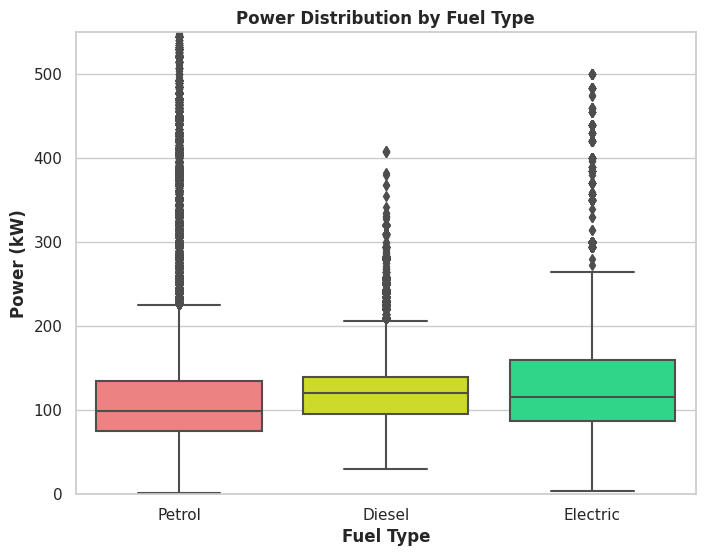

In [71]:
petrol_data = df[df['Fuel Type'] == 'Petrol']
diesel_data = df[df['Fuel Type'] == 'Diesel']
electric_data = df[df['Fuel Type'] == 'Electric']

petrol_power = petrol_data['Power (kW)']
diesel_power = diesel_data['Power (kW)']
electric_power = electric_data['Power (kW)']

sns.set_theme(style='whitegrid')
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))

colors = ['#FF7070', '#E7F80B', '#13F28B']
sns.set_palette(sns.color_palette(colors))

power_data = [petrol_power, diesel_power, electric_power]

sns.boxplot(data=[petrol_power, diesel_power, electric_power])

plt.xticks(ticks=[0, 1, 2], labels=['Petrol', 'Diesel', 'Electric'])

plt.xlabel('Fuel Type', fontweight='bold')
plt.ylabel('Power (kW)', fontweight='bold')
plt.title('Power Distribution by Fuel Type', fontweight='bold')

plt.ylim(0,550)
plt.show()


**2) Mileage Distribution by Car Brand**

In [72]:
df['Brand'].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

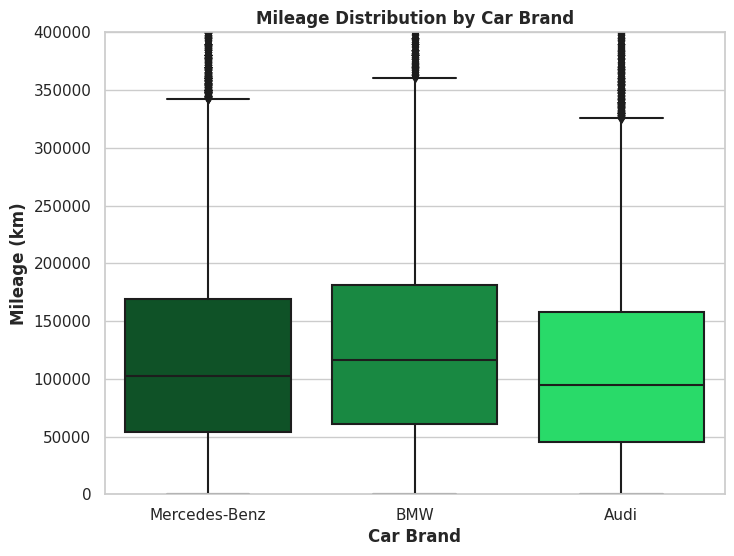

In [73]:
mercedes_data = df[df['Brand'] == 'mercedes-benz']
bmw_data = df[df['Brand'] == 'bmw']
audi_data = df[df['Brand'] == 'audi']

mercedes_mileage = mercedes_data['Mileage (km)']
bmw_mileage = bmw_data['Mileage (km)']
audi_mileage = audi_data['Mileage (km)']

mileage_data = [mercedes_mileage, bmw_mileage, audi_mileage]

plt.figure(figsize=(8, 6))

colors = ['#045D24', '#079B3D', '#0BF861']
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data = mileage_data)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Mercedes-Benz', 'BMW', 'Audi'])

plt.xlabel('Car Brand', fontweight='bold')
plt.ylabel('Mileage (km)', fontweight='bold')
plt.title('Mileage Distribution by Car Brand', fontweight='bold')

plt.ylim(0,400000)
plt.show()


**3) Price Distribution by Car Brand**

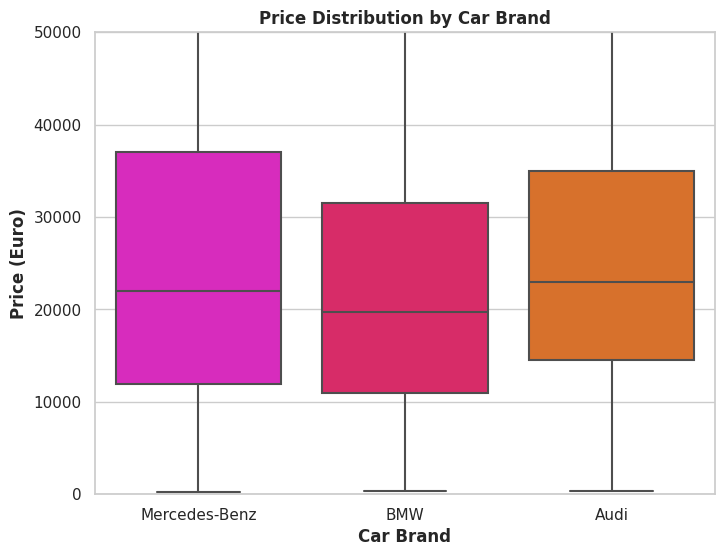

In [74]:
mercedes_data = df[df['Brand'] == 'mercedes-benz']
bmw_data = df[df['Brand'] == 'bmw']
audi_data = df[df['Brand'] == 'audi']

mercedes_price = mercedes_data['Price (Euro)']
bmw_price = bmw_data['Price (Euro)']
audi_price = audi_data['Price (Euro)']

price_data = [mercedes_price, bmw_price, audi_price]

plt.figure(figsize=(8, 6))

colors = ['#F310D1', '#F3105F', '#F36B10']
sns.set_palette(sns.color_palette(colors))


ax = sns.boxplot(data = price_data)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Mercedes-Benz', 'BMW', 'Audi'])

plt.xlabel('Car Brand', fontweight='bold')
plt.ylabel('Price (Euro)', fontweight='bold')
plt.title('Price Distribution by Car Brand', fontweight='bold')

plt.ylim(0, 50000)

plt.show()


**4) Price Distribution by Japanese Brands**

In [75]:
df['Price (Euro)'].mean()

26148.236491303534

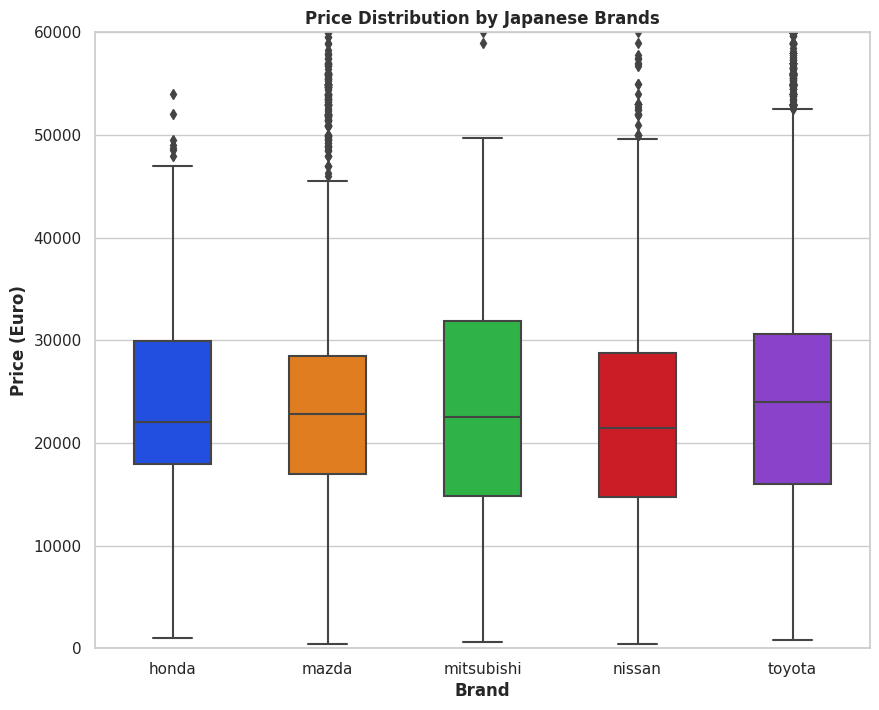

In [76]:
japanese_brands = ['toyota', 'nissan', 'honda', 'mazda', 'mitsubishi']
brand_price_data = df[df['Brand'].isin(japanese_brands)][['Brand', 'Price (Euro)']]

sns.set_palette("bright")

plt.figure(figsize=(10, 8))
sns.boxplot(data=brand_price_data, x='Brand', y='Price (Euro)', palette=sns.color_palette(), width=0.5)

plt.xlabel('Brand', fontweight='bold')
plt.ylabel('Price (Euro)', fontweight='bold')
plt.title('Price Distribution by Japanese Brands', fontweight='bold')

plt.ylim(0, 60000)

plt.show()


**5) Price Distribution by Color for Toyota**

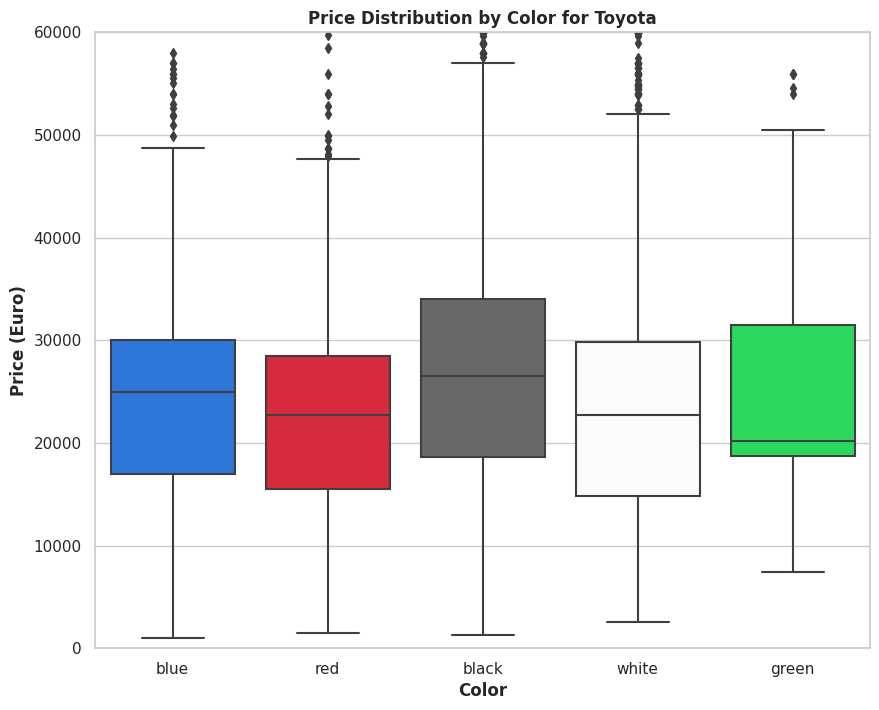

In [77]:
toyota_colors = ['red', 'blue', 'green', 'white', 'black']
toyota_data = df[(df['Brand'] == 'toyota') & (df['Color'].isin(toyota_colors))]

custom_colors = ['#1073F3','#F31027', '#68676A', '#FAFBFA', '#10F352']
sns.set_palette(custom_colors)

plt.figure(figsize=(10, 8))
sns.boxplot(data=toyota_data, x='Color', y='Price (Euro)')

plt.xlabel('Color', fontweight='bold')
plt.ylabel('Price (Euro)', fontweight='bold')
plt.title('Price Distribution by Color for Toyota', fontweight='bold')

plt.ylim(0, 60000)

plt.show()

**6) Yearly Sales Trend**

In [78]:
yearly_sales = df.groupby('Year')['Brand'].count()

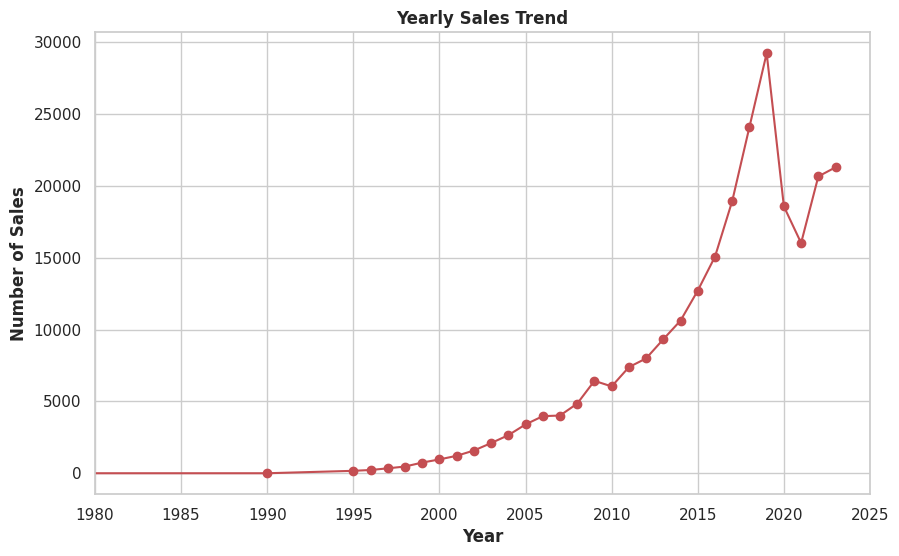

In [79]:
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o', color='r')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Sales', fontweight='bold')
plt.title('Yearly Sales Trend', fontweight='bold')

plt.xlim(1980,2025)

plt.show()

**7) Monthly Sales**

In [80]:
monthly_sales = df.groupby('Month')['Brand'].count()

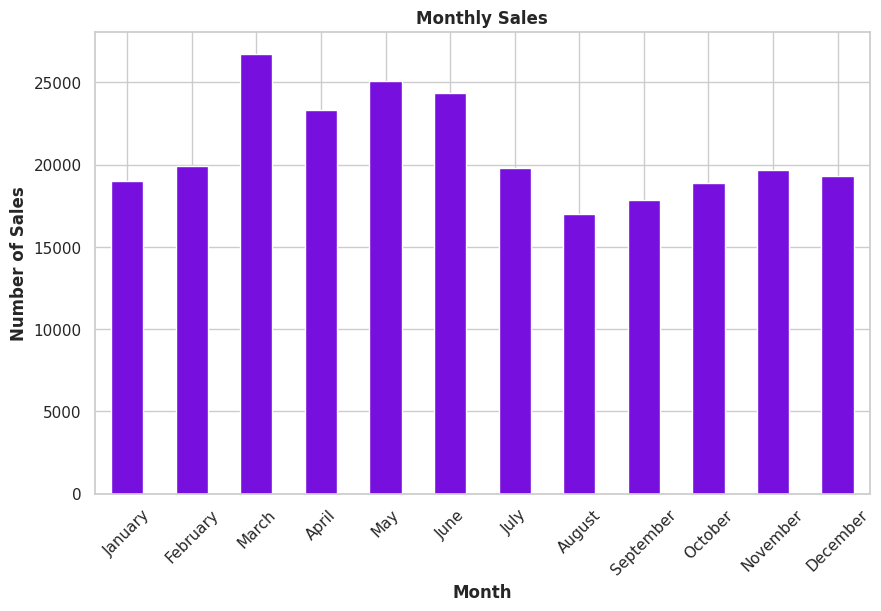

In [81]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='#770FDE')

plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Sales', fontweight='bold')
plt.title('Monthly Sales', fontweight='bold')

plt.xticks(range(12), month_names, rotation = 45)

plt.show()

**8) Transmission Type Distribution**

In [82]:
transmission_counts = df['Transmission Type'].value_counts()

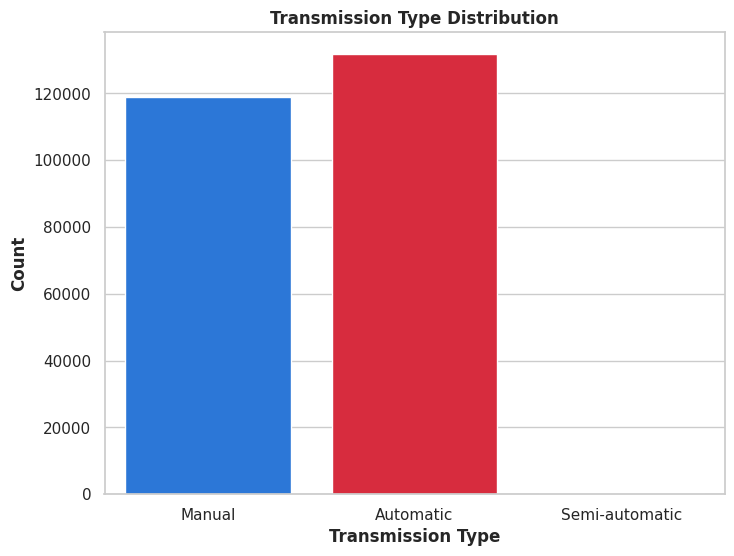

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission Type', data=df)

plt.xlabel('Transmission Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Transmission Type Distribution', fontweight='bold')

plt.show()


**9) Fuel Type Distribution**

In [84]:
fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'LPG']
fuel_counts = [143280, 86421, 12607, 5967, 1255]


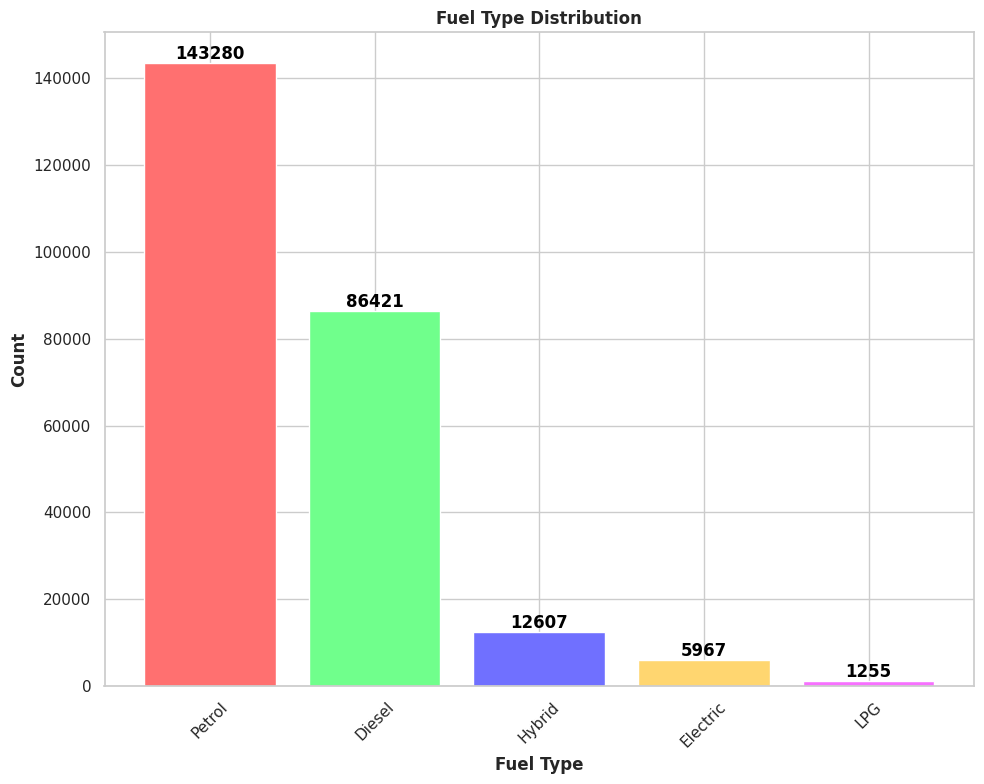

In [85]:
colors = ['#FF7070', '#70FF8C', '#7070FF', '#FFD670', '#F770FF']

plt.figure(figsize=(10, 8))

plt.bar(fuel_types, fuel_counts, color=colors)
plt.xlabel('Fuel Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')


plt.title('Fuel Type Distribution', fontweight='bold')

for i, count in enumerate(fuel_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**10) Top famous colors**

In [87]:
color_counts = df['Color'].value_counts()


In [88]:
colors = color_counts.index.tolist()
counts = color_counts.values.tolist()

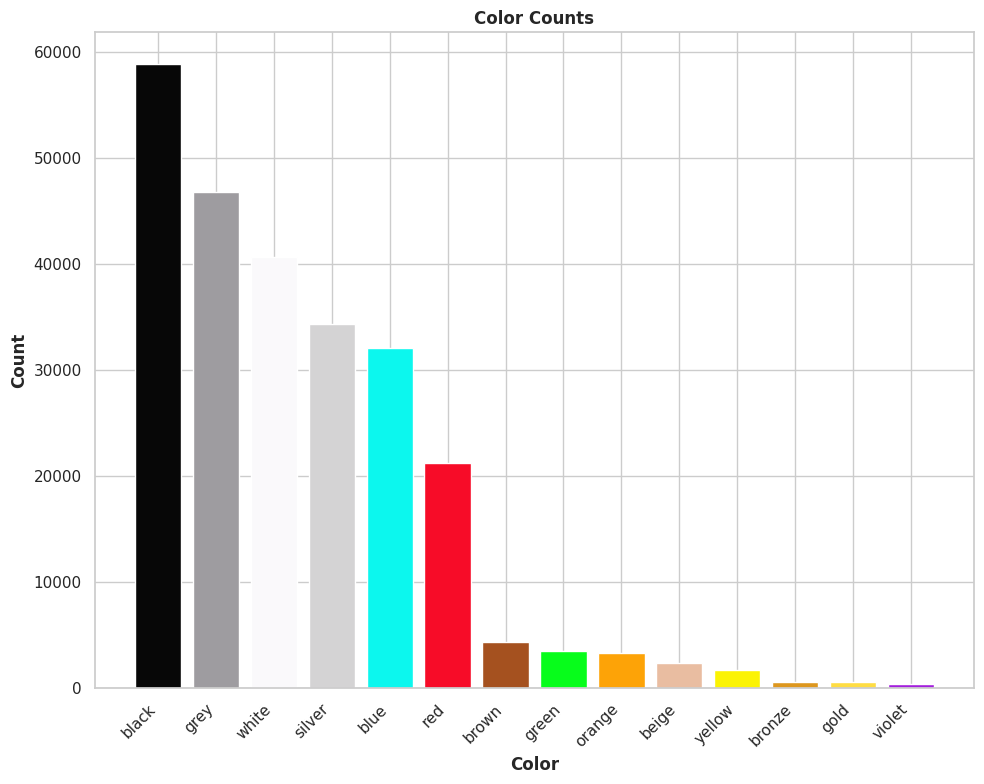

In [92]:
color_palette = ['#070707', '#9E9CA0', '#FAF9FB', '#D4D3D4', '#0CF7EE', '#F70C28', '#A5511F', '#07FD1B', '#FDA307', '#E9BDA1', '#FBF304', '#DD971E', '#FFDD43', '#A31EDD']

plt.figure(figsize=(10, 8))
plt.bar(colors, counts, color=color_palette)

plt.xlabel('Color', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Color Counts', fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**11) WordCloud**

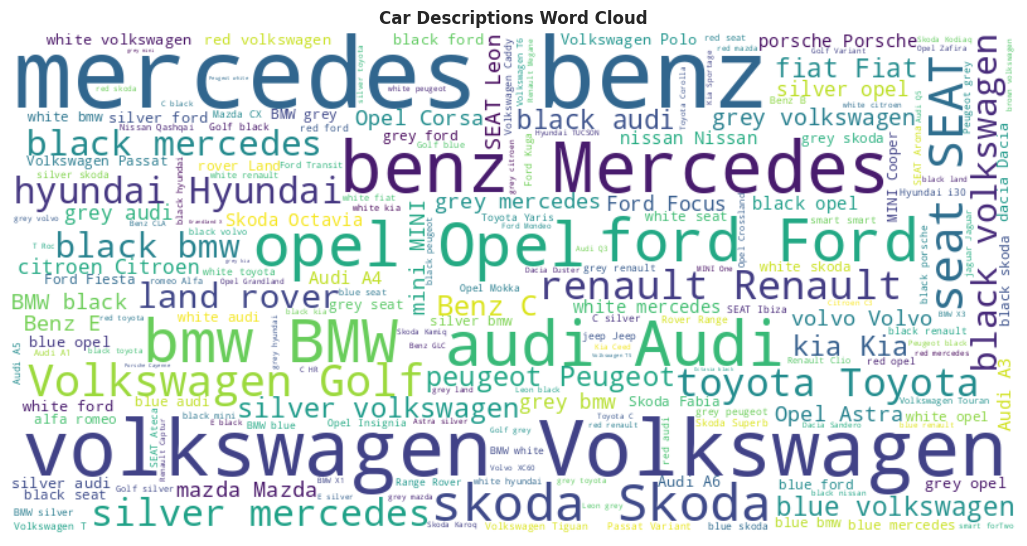

In [98]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

descriptions = df['Brand'] + ' ' + df['Model'] + ' ' + df['Color']

text = ' '.join(descriptions)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Car Descriptions Word Cloud', fontweight='bold')
plt.show()
